<a href="https://colab.research.google.com/github/RANGAM-AKHILA/RANGAM-AKHILA/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

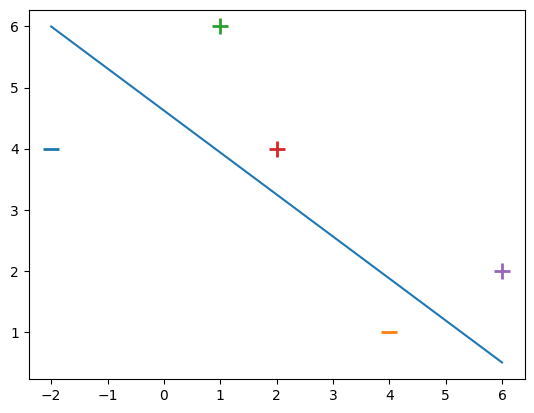

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

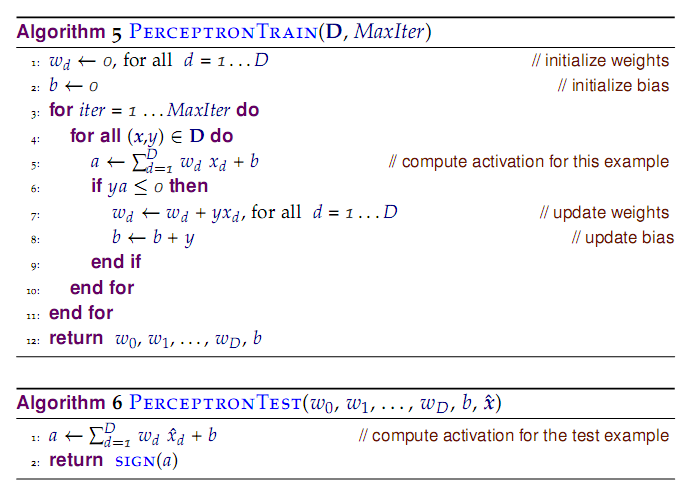

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

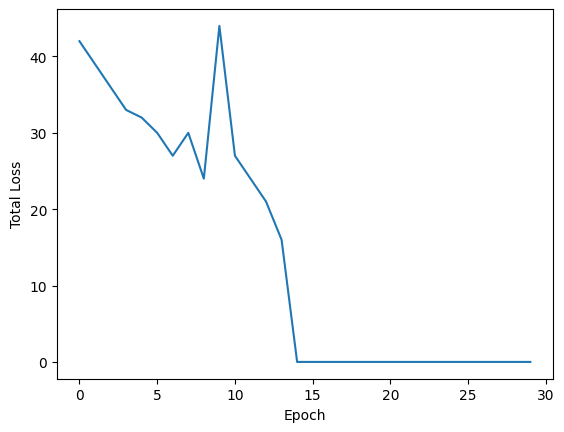

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

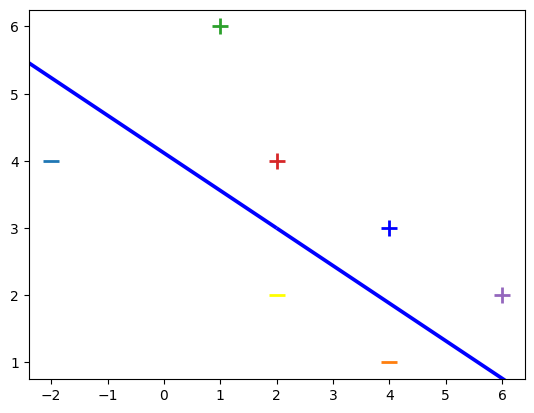

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



**1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.**

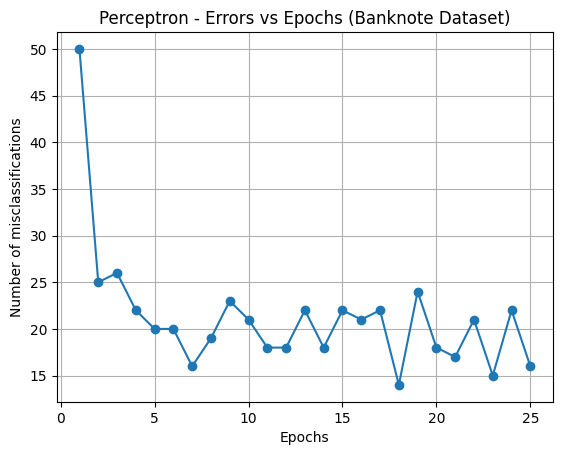

Test Accuracy: 0.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Banknote Authentication Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train a Perceptron manually to record error per epoch
class PerceptronWithErrorTracking:
    def __init__(self, learning_rate=0.01, n_iter=20):
        self.lr = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.errors_ = []
        self.w_ = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Initialize and fit Perceptron
ppn = PerceptronWithErrorTracking(learning_rate=0.01, n_iter=25)
ppn.fit(X_train_std, y_train)

# Plot error vs epochs
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Errors vs Epochs (Banknote Dataset)')
plt.grid(True)
plt.show()

# Test accuracy
y_pred = ppn.predict(X_test_std)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")


**2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

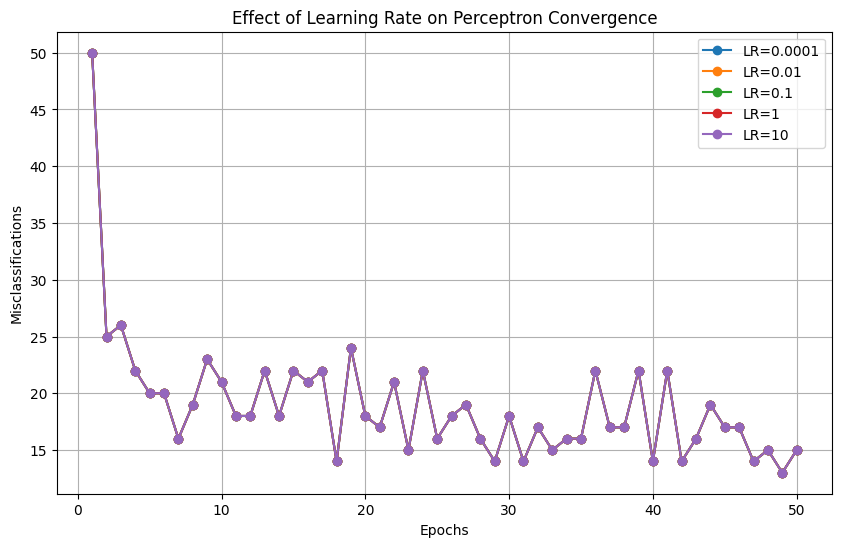

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Banknote Authentication Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

# Perceptron class with error tracking
class PerceptronWithErrorTracking:
    def __init__(self, learning_rate=0.01, n_iter=25):
        self.lr = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.errors_ = []
        self.w_ = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0:
                break  # Early stopping if converged
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Try different learning rates
learning_rates = [0.0001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    model = PerceptronWithErrorTracking(learning_rate=lr, n_iter=50)
    model.fit(X_train_std, y_train)
    plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o', label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Effect of Learning Rate on Perceptron Convergence')
plt.legend()
plt.grid(True)
plt.show()


A very small learning rate leads to slow learning and may require many iterations.An optimal learning rate usually allows fast and stable convergence.
However, a very large learning rate causes oscillations or divergence, and the model may never converge.

**3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.**

Predictions: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
True Labels: [-1, 1, 1, -1]


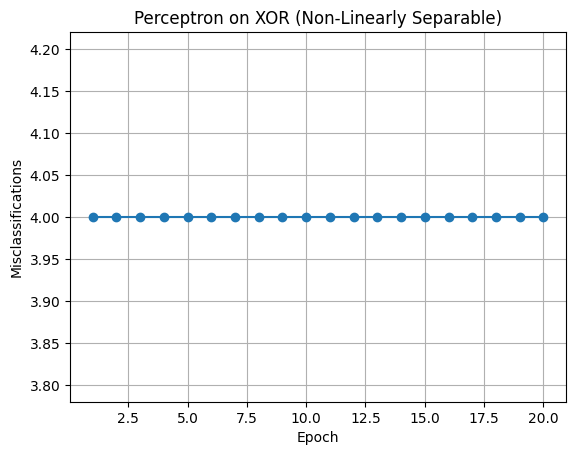

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset (not linearly separable)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([-1, 1, 1, -1])  # Change labels to -1 and 1 for perceptron rule

# Algorithm 5: PerceptronTrain
def perceptron_train(D, MaxIter):
    D_features = D[:, :-1]
    D_labels = D[:, -1]
    n_samples, n_features = D_features.shape

    w = np.zeros(n_features)  # weights
    b = 0                     # bias
    errors = []

    for _ in range(MaxIter):
        error_count = 0
        for x, y in zip(D_features, D_labels):
            a = np.dot(w, x) + b
            if y * a <= 0:
                w += y * x     # update weights
                b += y         # update bias
                error_count += 1
        errors.append(error_count)
    return w, b, errors

# Algorithm 6: PerceptronTest
def perceptron_test(w, b, x):
    a = np.dot(w, x) + b
    return np.sign(a)

# Combine X and y into dataset D
D = np.hstack((X, y.reshape(-1, 1)))

# Train perceptron
w, b, errors = perceptron_train(D, MaxIter=20)

# Test predictions
predictions = [perceptron_test(w, b, x) for x in X]
print("Predictions:", predictions)
print("True Labels:", y.tolist())

# Plot misclassifications per iteration
plt.plot(range(1, len(errors)+1), errors, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron on XOR (Non-Linearly Separable)")
plt.grid(True)
plt.show()


The XOR dataset is not linearly separable, so the Perceptron fails to converge.
It keeps updating weights, but the number of misclassifications never reaches zero.The decision boundary can't split the classes correctly with a straight line.This demonstrates a major limitation of the Perceptron that it only works for linearly separable data.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


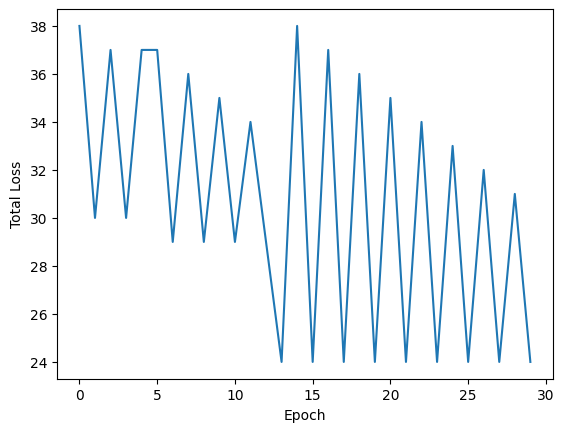

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1. i) Yes, the dataset is linearly separable, so it can be learned by the Perceptron algorithm.

   ii)The Perceptron starts with weights and bias as zero and updates them each time a misclassified sample is found. After three iterations through the dataset, the algorithm converges with final weights [2, 1] and bias -1, successfully classifying all inputs of the function.

2.There are 2 Boolean functions over 2-bit inputs that are not learnable by a Perceptron because they are not linearly separable


*   1.XOR

    Reason is positive and negative outputs are diagonally opposite such that there is no straight line can separate them.

     truth table for XOR

    X1   X2    XOR(X1,X2)

    0     0      0

    0      1     1
     
    1      0     1

    1      1     0
   
*   XNOR (Exclusive NOR)

    Reason is it is inverse of XOR that still not lineraly separable.
    
    truth table for XNOR
    
    X1 X2 XNOR(X1,X2)

    0 0 1

    0 1 0

    1 0 0

    1 1 1

  out of all 16 Bo0lean functions only XOR and XNOR are not perceptron learnable because outputs cannot be separated by a linear decision boundary ,which makes them non- linearly separable.
    

    
